In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import torch
import torch.nn as nn

import seaborn as sb
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
data_path = 'data/Kimchi_dataset.xlsx'

In [3]:
data = pd.read_excel('Kimchi_dataset.xlsx')

In [4]:
data.head()

,Date,Region,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes,Price
0,2018-03-25,Seoul,2321.82,2006.46,1996.46,10.00,0.0,1.71
1,2018-03-18,Seoul,3154.45,2580.60,2577.27,3.33,0.0,1.66
2,2018-03-11,Seoul,2570.52,2209.29,2209.29,0.00,0.0,1.68
3,2018-03-04,Seoul,3851.30,3242.98,3239.65,3.33,0.0,1.48
4,2018-02-25,Seoul,5356.63,4007.48,4007.48,0.00,0.0,1.56


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          648 non-null    datetime64[ns]
 1   Region        648 non-null    object        
 2   Total Volume  647 non-null    float64       
 3   Total Boxes   648 non-null    float64       
 4   Small Boxes   648 non-null    float64       
 5   Large Boxes   648 non-null    float64       
 6   XLarge Boxes  648 non-null    float64       
 7   Price         644 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 40.6+ KB


In [6]:
data.isnull().sum()

Date            0
Region          0
Total Volume    1
Total Boxes     0
Small Boxes     0
Large Boxes     0
XLarge Boxes    0
Price           4
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Volume,647.0,75005.910000,212743.996169,2064.90,9168.7500,17722.27,41172.0950,1814929.97
Total Boxes,648.0,49639.351898,140777.215528,988.45,6724.7125,11860.87,29157.0050,1124621.50
Small Boxes,648.0,40598.748580,115044.249219,284.43,4813.2050,9120.54,25105.7425,944572.50
Large Boxes,648.0,9032.257948,29633.321649,0.00,14.3225,622.72,3289.0350,267818.31
XLarge Boxes,648.0,8.345370,43.304003,0.00,0.0000,0.00,0.0000,510.41
Price,644.0,6.533540,118.516792,1.01,1.4100,1.55,1.7100,3003.00


### Filling the missing value with forward fill method.

In [76]:
#data.fillna(method='ffill', inplace = True)

data = data.dropna()

In [77]:
data.isnull().sum()

Date            0
Region          0
Total Volume    0
Total Boxes     0
Small Boxes     0
Large Boxes     0
XLarge Boxes    0
Price           0
dtype: int64

In [80]:
data.Region.unique()

array([29, 21, 40,  1, 35,  4,  6, 22, 14,  8, 26,  0,  2,  3,  5,  9, 11,
       12, 13, 18, 23, 32, 33, 27, 39, 36, 28, 24, 31, 20, 25, 30, 34, 37,
       38,  7, 16, 17, 10, 15, 19])

In [81]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(data.Region)
data['Region'] = label_encoder.transform(data.Region)

<ipython-input-81-c0ab4391aaa2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Region'] = label_encoder.transform(data.Region)


In [82]:
data.Region.unique()

array([29, 21, 40,  1, 35,  4,  6, 22, 14,  8, 26,  0,  2,  3,  5,  9, 11,
       12, 13, 18, 23, 32, 33, 27, 39, 36, 28, 24, 31, 20, 25, 30, 34, 37,
       38,  7, 16, 17, 10, 15, 19])

### Finding the correlation among the features

In [83]:
correlation = data.corr()

round(correlation, 2)

,Region,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes,Price
Region,1.00,-0.16,-0.17,-0.15,-0.19,-0.14,-0.02
Total Volume,-0.16,1.00,0.99,0.98,0.87,0.50,-0.01
Total Boxes,-0.17,0.99,1.00,0.99,0.89,0.52,-0.01
Small Boxes,-0.15,0.98,0.99,1.00,0.84,0.45,-0.01
Large Boxes,-0.19,0.87,0.89,0.84,1.00,0.73,-0.01
XLarge Boxes,-0.14,0.50,0.52,0.45,0.73,1.00,-0.01
Price,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,1.00


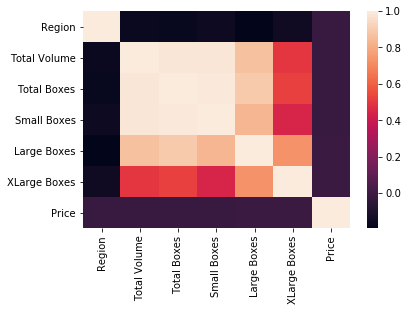

In [84]:
sb.heatmap(data.corr())
plt.show()

### As we have date as a feature, we need to convert them into numerical value. We can do that by using datetime packages.

In [85]:
data['Date']=data['Date'].map(dt.datetime.toordinal)

<ipython-input-85-ce10b77a80f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date']=data['Date'].map(dt.datetime.toordinal)


In [86]:
data.head()

,Date,Region,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes,Price
0,736778,29,2321.82,2006.46,1996.46,10.00,0.0,1.71
1,736771,29,3154.45,2580.60,2577.27,3.33,0.0,1.66
2,736764,29,2570.52,2209.29,2209.29,0.00,0.0,1.68
3,736757,29,3851.30,3242.98,3239.65,3.33,0.0,1.48
4,736750,29,5356.63,4007.48,4007.48,0.00,0.0,1.56


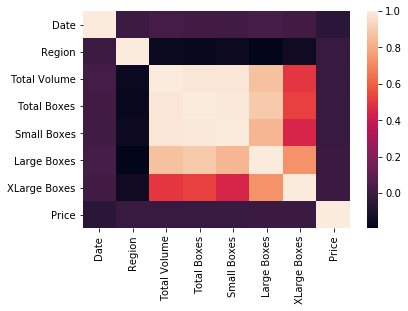

In [87]:
sb.heatmap(data.corr())
plt.show()

### Comment

Now, it should be a classic regression problem where `Y` is `Price` and rest of the features are `X`.

Try to use XgBoost or simmilar types of ML algorithm because with limited data, these algorithm are proved to work well, try to avoid NN as we can not use data augmentation with ease.

XgBoost for regression, see this reference: https://machinelearningmastery.com/xgboost-for-regression/

N.B: I am not sure what other things to add as part of the analysis, clearly there is not much relation among most of the features!

In [208]:
# evaluate an xgboost regression model on the kimchi dataset
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
# load the dataset
N_data = data.values

In [209]:
N_data

array([[7.367780e+05, 2.900000e+01, 2.321820e+03, ..., 1.000000e+01,
        0.000000e+00, 1.710000e+00],
       [7.367710e+05, 2.900000e+01, 3.154450e+03, ..., 3.330000e+00,
        0.000000e+00, 1.660000e+00],
       [7.367640e+05, 2.900000e+01, 2.570520e+03, ..., 0.000000e+00,
        0.000000e+00, 1.680000e+00],
       ...,
       [7.367150e+05, 3.000000e+00, 1.376676e+04, ..., 4.231000e+01,
        0.000000e+00, 1.870000e+00],
       [7.367080e+05, 3.000000e+00, 1.620522e+04, ..., 5.000000e+01,
        0.000000e+00, 1.930000e+00],
       [7.367010e+05, 3.000000e+00, 1.748958e+04, ..., 2.601000e+01,
        0.000000e+00, 1.620000e+00]])

In [210]:
# split data into input and output columns
X, y = N_data[:, :-1], N_data[:, -1]
# define model
model = XGBRegressor()

In [ ]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [90]:
from numpy import asarray

# fit model
model.fit(X, y)
# define new data
row = [736771, 29, 3154.45, 2580.60, 2577.27, 3.33, 0.0]
new_data = asarray([row])
# make a prediction
yhat = model.predict(new_data)
# summarize prediction
print('Predicted: %.2f' % yhat)

Predicted: 1.65


In [240]:
X = data [['Date', 'Region', 'Total Volume', 'Total Boxes', 'Small Boxes',
       'Large Boxes', 'XLarge Boxes']]
y = data ['Price']

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [243]:
X_train

,Date,Region,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes
185,736743,3,157146.89,108112.62,98871.98,9240.64,0.00
521,736743,17,40425.93,26505.86,11523.90,14950.62,31.34
179,736701,2,11449.30,8423.53,8423.53,0.00,0.00
261,736715,13,7491.53,5115.15,5115.15,0.00,0.00
154,736708,26,36501.82,27213.19,25789.59,1423.60,0.00
...,...,...,...,...,...,...,...
72,736778,4,190257.38,89631.19,89424.11,207.08,0.00
107,736701,6,41573.25,11854.05,11850.72,3.33,0.00
272,736722,18,97026.15,60603.68,60596.54,7.14,0.00
437,736743,34,20608.98,13690.38,3448.31,10232.51,9.56


In [244]:
y_train.shape

(431,)

In [245]:
X_test

,Date,Region,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes
634,736708,5,207999.67,126261.89,89115.78,37133.99,12.12
595,736729,19,6294.16,6056.85,2847.48,3209.37,0.00
602,736764,19,8115.07,7621.55,7494.08,127.47,0.00
293,736743,32,9673.24,8762.49,7794.44,968.05,0.00
73,736771,4,202790.74,102870.50,102717.50,153.00,0.00
...,...,...,...,...,...,...,...
94,736708,4,19522.15,12129.51,12116.18,13.33,0.00
262,736708,13,9883.94,6186.81,6180.41,6.40,0.00
416,736722,25,13137.18,11867.69,11867.69,0.00,0.00
590,736764,19,4685.01,4455.05,775.90,3679.15,0.00


In [246]:
y_test

634    1.82
595    1.22
602    1.31
293    1.52
73     1.75
       ... 
94     1.45
262    1.98
416    1.38
590    1.25
28     1.47
Name: Price, Length: 213, dtype: float64

In [247]:
from xgboost import XGBRegressor

In [248]:
# define modely_test
model = XGBRegressor()

In [249]:
# fit model
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [250]:
from numpy import asarray

# define new data
row = [736750,9,25590.99, 19800.99, 19544.33, 256.66, 0.00]
new_data = asarray([row])
# make a prediction
yhat = model.predict(new_data)
# summarize prediction
print('Predicted: %.2f' % yhat)

Predicted: 1.41


In [251]:
predictions = model.predict(X_test)

In [252]:
accuracy = model.score(X_test, y_test)

In [253]:
print(accuracy)

0.6517603760892348


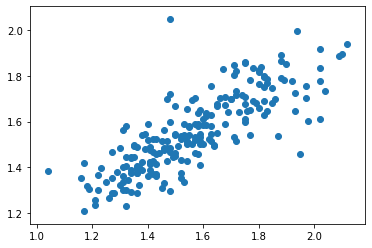

In [224]:
plt.scatter(y_test, predictions)

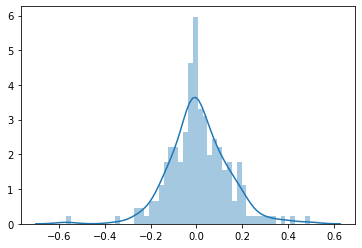

In [225]:
sb.distplot((y_test-predictions), bins= 50)

In [165]:
from xgboost import plot_importance

In [167]:
print(model.feature_importances_)

[9.4354048e-04 6.3024077e-04 3.3840888e-07 3.3284459e-07 9.9653667e-01
 1.8886739e-03 1.9428546e-07]


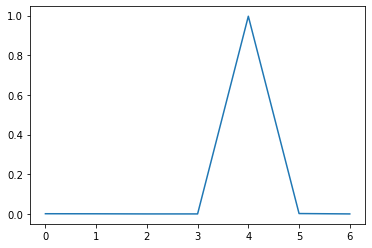

In [197]:
plt.plot(model.feature_importances_)

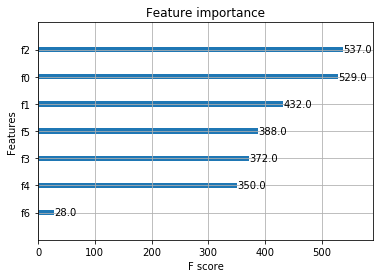

In [168]:
# plot feature importance
plot_importance(model)
plt.show()

In [198]:
X_n = data ['Small Boxes']
y_n = data ['Price']

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.33, random_state=42)

In [201]:
from xgboost import XGBRegressor

In [202]:
# define modely_test
model1 = XGBRegressor()

In [203]:
# fit model
model1.fit(X_train_n, y_train_n)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [205]:
from numpy import asarray

# define new data
row = [19544.33]
new_data = asarray([row])
# make a prediction
yhat = model1.predict(new_data)
# summarize prediction
print('Predicted: %.2f' % yhat)

Predicted: 1.42


In [206]:
accuracy_n = model1.score(X_test_n, y_test_n)

In [207]:
print(accuracy_n)

-0.6174784568861715


In [148]:
# Liner Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [149]:
# fit model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
from numpy import asarray

# define new data
row = [736750,9,25590.99, 19800.99, 19544.33, 256.66, 0.00]
new_data = asarray([row])
# make a prediction
yhat = model.predict(new_data)
# summarize prediction
print('Predicted: %.2f' % yhat)

Predicted: -5107094910858525696.00


In [150]:
predictions = model.predict(X_test)
accuracy = model.score(X_test, y_test)

In [151]:
accuracy

-4295.828557946749

In [114]:
print(predictions)
y_test

[1.6272805 1.3647928 1.4014075 1.4300768 1.6760718 1.6463995 1.4753637
 1.5242143 1.5819685 1.2552004 1.5455763 1.4071535 1.3332081 1.6375477
 1.5303309 1.5898126 1.490807  1.3600672 1.3031569 1.4253669 1.7275535
 1.2845204 1.5206528 1.7682092 1.424136  1.5159652 1.4824748 1.6526028
 1.7495114 1.5150228 1.8673462 1.8211617 1.6093929 1.587256  1.4285823
 2.0482607 1.4669348 1.533408  1.8973755 1.7545813 1.6759827 1.4401017
 1.6713281 1.7039287 1.2970445 1.7083108 1.57985   1.7650107 1.5024853
 1.4146389 1.543781  1.7841281 1.379114  1.542421  1.334207  1.4979289
 1.3625133 1.4592562 1.840538  1.6663623 1.6951919 1.7054434 1.5034963
 1.5170015 1.2904667 1.70007   1.5987264 1.7344681 1.8521433 1.5426065
 1.2346883 1.5402362 1.7472644 1.8038963 1.77706   1.798465  1.6094602
 1.3522917 1.3686703 1.6997149 1.5489109 1.2287728 1.2863623 1.5441867
 1.5866346 1.408463  1.8910934 1.3833431 1.5369878 1.5416515 1.5651234
 1.4231393 1.8268942 1.4628237 1.8483989 1.7963663 1.6821991 1.3213731
 1.388

634    1.82
595    1.22
602    1.31
293    1.52
73     1.75
       ... 
94     1.45
262    1.98
416    1.38
590    1.25
28     1.47
Name: Price, Length: 213, dtype: float64

In [128]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

In [129]:
import math

rmse = math.sqrt(mse)

In [130]:
rmse

0.12950283023264997

In [131]:
Accuracy = 1.96*rmse

In [132]:
Accuracy

0.25382554725599393

In [ ]:
predictions = model.predict(X_test)

In [56]:
#Evaluating the Algorithm 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

ValueError: continuous is not supported